In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [40]:
census = pd.DataFrame(pd.read_csv('us-census-demographic-data/acs2017_census_tract_data.csv'))

In [41]:
census.describe()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,...,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,2.839113e+10,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,...,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,1.647593e+10,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,...,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,...,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,...,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,...,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,7.215375e+10,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,...,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [34]:
census.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [35]:
census.FamilyWork = census.FamilyWork.fillna(0)

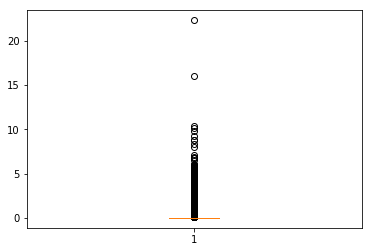

In [36]:
plt.boxplot(census.FamilyWork)
plt.show()

In [42]:
#q1 = np.percentile(census.FamilyWork, 25)
#q3 = np.percentile(census.FamilyWork, 75)
#iqr = q3 - q1

#upper_fence = q3 + 3 * iqr
#lower_fence = q1 - 3 * iqr

#census = census[(census.FamilyWork < upper_fence) & (census.FamilyWork > lower_fence)]
#census

In [46]:
def to_percent(x):
    return(x/100)

In [53]:
conversion_list = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'PrivateWork', 'PublicWork']



new_column_list = [x+'Rate' for x in conversion_list]
census[new_column_list] = census[conversion_list].apply(to_percent)



In [56]:
census['NativeRateRounded'] = round(census['NativeRate'], 3)

In [54]:
census['TotalPopScaled'] = MinMaxScaler().fit_transform(census.TotalPop.values.reshape(-1,1))

/Users/jonas_gratt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
census.TotalPopScaled.describe()

count    74001.000000
mean         0.066914
std          0.034015
min          0.000000
25%          0.044302
50%          0.062645
75%          0.084025
max          1.000000
Name: TotalPopScaled, dtype: float64

In [58]:
states = pd.get_dummies(census.State, drop_first=True)
census_dummy = pd.concat([census, states], axis=1)
census_dummy.columns.values

array(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive',
       'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ChildPovertyRate', 'ProfessionalRate',
       'ServiceRate', 'OfficeRate', 'ConstructionRate', 'ProductionRate',
       'DriveRate', 'CarpoolRate', 'TransitRate', 'WalkRate',
       'OtherTranspRate', 'WorkAtHomeRate', 'EmployedRate',
       'PrivateWorkRate', 'PublicWorkRate', 'TotalPopScaled',
       'NativeRateRounded', 'Alaska', 'Arizona', 'Arkansas', 'California'

In [59]:
shuffled_census = census.sample(frac=1)

In [60]:
census_prop_sample = census.sample(frac=0.5)

census_size_sample = census.sample(n=1000)

In [64]:
from sklearn.model_selection import train_test_split

census_train, census_test = train_test_split(census, test_size = 0.2)
census_train.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate,TotalPopScaled,NativeRateRounded
56264,42029300103,Pennsylvania,Chester County,2655,1290,1365,5.1,74.0,8.3,0.0,...,0.071,0.125,0.037,0.008,0.056,13.20,0.882,0.070,0.040517,0.000
55739,42003562400,Pennsylvania,Allegheny County,2717,1362,1355,7.4,33.2,46.0,0.0,...,0.096,0.266,0.009,0.040,0.029,13.23,0.794,0.182,0.041463,0.000
38862,29510116200,Missouri,St. Louis city,4061,1929,2132,3.6,75.2,12.2,0.3,...,0.061,0.041,0.032,0.012,0.089,24.76,0.842,0.111,0.061974,0.003
60439,47037018407,Tennessee,Davidson County,4520,2063,2457,2.9,84.3,4.4,0.0,...,0.094,0.015,0.003,0.010,0.076,24.62,0.825,0.095,0.068978,0.000
14069,11001009604,District of Columbia,District of Columbia,2204,878,1326,2.5,2.3,93.4,0.4,...,0.058,0.287,0.015,0.010,0.032,10.56,0.702,0.273,0.033634,0.004


In [65]:
census_test.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate,TotalPopScaled,NativeRateRounded
31084,24510150500,Maryland,Baltimore city,1582,682,900,2.9,0.8,96.0,0.0,...,0.086,0.349,0.012,0.000,0.031,6.48,0.767,0.222,0.024142,0.000
51239,39035179101,Ohio,Cuyahoga County,3333,1445,1888,1.6,84.9,2.2,0.0,...,0.051,0.010,0.020,0.000,0.098,16.13,0.811,0.110,0.050864,0.000
36095,27053027601,Minnesota,Hennepin County,3781,1973,1808,1.1,92.6,0.5,0.0,...,0.020,0.047,0.022,0.024,0.096,22.16,0.870,0.078,0.057701,0.000
44011,36029007903,New York,Erie County,3320,1515,1805,2.0,92.4,0.0,0.0,...,0.134,0.023,0.000,0.005,0.010,17.66,0.840,0.131,0.050665,0.000
5946,6037407400,California,Los Angeles County,2008,992,1016,48.1,10.3,3.5,0.6,...,0.161,0.027,0.000,0.014,0.034,10.22,0.757,0.193,0.030643,0.006
